In [1]:
from __future__ import division, print_function

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from scipy import interpolate

In [5]:
from mpldatacursor import datacursor

In [6]:
dmsi_coords = [0,15,30,45,60,75,90,105,120]

In [7]:
lv_coords = [600,800,1000]

In [8]:
# Simulated Offline
#eh = np.array([[25, 20, 15, 10, 5, 0, 0, 0, 0],[37.5, 32.5, 27.5, 22.5, 17.5, 12.5, 7.5, 2.5, 0],[50, 45, 40, 35, 30, 25, 20, 15, 10]])
#ew = np.array([[400, 370, 340, 310, 280, 250, 220, 190, 160],[400, 370, 340, 310, 280, 250, 220, 190, 160],[400, 370, 340, 310, 280, 250, 220, 190, 160]])
# QC - PCIe Package
#eh = np.array([[39.9, 27.1, 12.5, 0, 0, 0, 0, 0, 0], [51.5, 39.6, 25.1, 9.8, 0, 0, 0, 0, 0], [66.9, 54.8, 40.7, 25.6, 11.2, 0, 0, 0, 0]])
#ew = np.array([[523, 405, 229, 0, 0, 0, 0, 0, 0], [530, 444, 319, 160, 0, 0, 0, 0, 0],[536, 470, 383, 271, 150, 0, 0, 0, 0]])
# QC - Hawker Package Model
#eh = np.array([[52.3, 40, 25.5, 10.7, 0, 0, 0, 0, 0],[66.8, 55.3, 40.2, 25.6, 11, 0, 0, 0, 0],[87.3, 75.8, 61.2, 47.3, 32.2, 17.1, 3, 0, 0]])
#ew = np.array([[552, 465, 329, 177, 0, 0, 0, 0, 0], [555, 500, 391, 275, 144, 0, 0, 0, 0],[558, 520, 443, 365, 272, 170, 84, 0, 0]])
# MPJ Internal ISI System
eh = np.array([[44.6, 31.7, 16.9, 2, 0, 0, 0, 0, 0],[58.7, 46, 31.6, 17.1, 2.5, 0, 0, 0, 0],[75, 63, 49, 34.6, 19.2, 4.9, 0, 0, 0]])
ew = np.array([[523, 429, 278, 105, 0, 0, 0, 0, 0],[521, 456, 346, 225, 95, 0, 0, 0, 0],[529, 486, 403, 310, 203, 114, 0, 0, 0]])

In [9]:
xx,yy = np.meshgrid(dmsi_coords, lv_coords)

First plot the raw Eye Height & Eye Width data

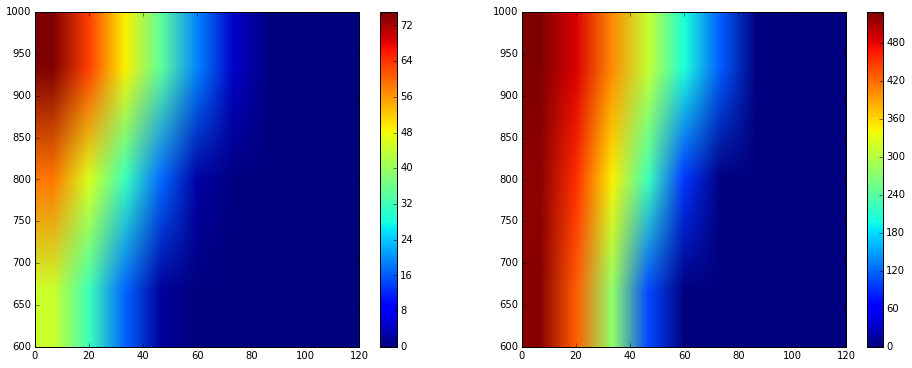

In [10]:
fig = plt.figure(figsize=(16, 6))
eh_ax = plt.subplot(121)
c_eh_ax = eh_ax.imshow(np.flipud(eh), extent=[xx.min(), xx.max(), yy.min(), yy.max()], aspect = "auto")
numrows, numcols = eh.shape
c_eh_bar = fig.colorbar(c_eh_ax)
ew_ax = plt.subplot(122)
c_ew_ax = ew_ax.imshow(np.flipud(ew), extent=[xx.min(), xx.max(), yy.min(), yy.max()], aspect = "auto")
numrows, numcols = eh.shape
c_ew_bar = fig.colorbar(c_ew_ax)
plt.show()

Set the new x,y dimensions

In [11]:
N_lv = 300
N_dmsi = 900

In [12]:
dmsi_new = np.linspace(0,120,N_dmsi)
lv_new = np.linspace(600,1000,N_lv)

In [13]:
xx_interp,yy_interp = np.meshgrid(dmsi_new, lv_new)

Interpolate the Eye Height & Width data to the new dimensions

In [14]:
eh_interp_func = interpolate.interp2d(dmsi_coords, lv_coords, eh, kind = 'linear')
eh_new = eh_interp_func(dmsi_new, lv_new)
ew_interp_func = interpolate.interp2d(dmsi_coords, lv_coords, ew, kind = 'linear')
ew_new = ew_interp_func(dmsi_new, lv_new)

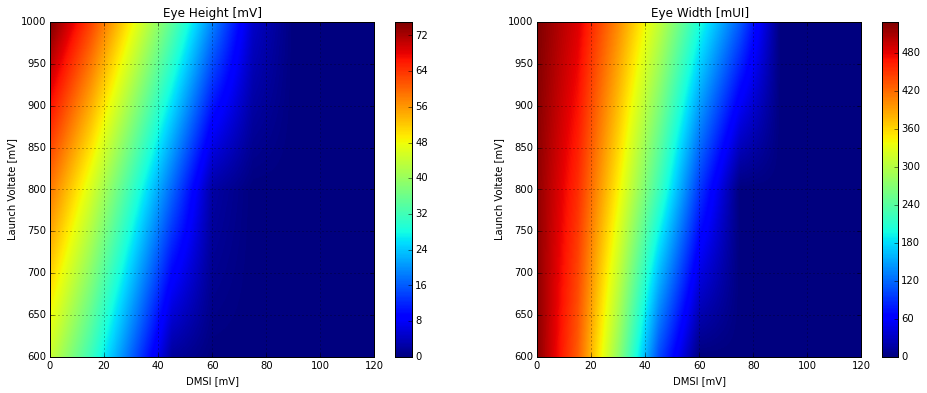

In [26]:
fig = plt.figure(figsize=(16, 6))
eh_ax = plt.subplot(121)
c_eh_ax = eh_ax.imshow(np.flipud(eh_new), extent=[xx.min(), xx.max(), yy.min(), yy.max()], aspect = "auto")
numrows, numcols = eh_new.shape
def format_coord(x, y):
    col = np.searchsorted(dmsi_new,x)
    row = np.searchsorted(lv_new,y)
    if col>=0 and col<numcols and row>=0 and row<numrows:
        z = eh_new[row,col]
        return 'x=%1.4f, y=%1.4f, z=%1.4f'%(x, y, z)
    else:
        return 'x=%1.4f, y=%1.4f'%(x, y)
eh_ax.format_coord = format_coord
eh_ax.grid()
eh_ax.set_title("Eye Height [mV]")
eh_ax.set_ylabel("Launch Voltate [mV]")
eh_ax.set_xlabel("DMSI [mV]")
c_eh_bar = fig.colorbar(c_eh_ax)

ew_ax = plt.subplot(122)
c_ew_ax = ew_ax.imshow(np.flipud(ew_new), extent=[xx.min(), xx.max(), yy.min(), yy.max()], aspect = "auto")
numrows, numcols = ew_new.shape
def format_coord(x, y):
    col = np.searchsorted(dmsi_new,x)
    row = np.searchsorted(lv_new,y)
    if col>=0 and col<numcols and row>=0 and row<numrows:
        z = ew_new[row,col]
        return 'x=%1.4f, y=%1.4f, z=%1.4f'%(x, y, z)
    else:
        return 'x=%1.4f, y=%1.4f'%(x, y)
ew_ax.format_coord = format_coord
ew_ax.grid()
ew_ax.set_title("Eye Width [mUI]")
ew_ax.set_ylabel("Launch Voltate [mV]")
ew_ax.set_xlabel("DMSI [mV]")
c_ew_bar = fig.colorbar(c_ew_ax)

plt.show()

Now create a new combined Eye Height/Width RSS goal

In [22]:
ideal_eh = 25
eh_variation = 0.5
ideal_ew = 325
ew_variation = 10
ehew_dev = np.sqrt(((eh_new-ideal_eh)/eh_variation)**2 + ((ew_new-ideal_ew)/ew_variation)**2)

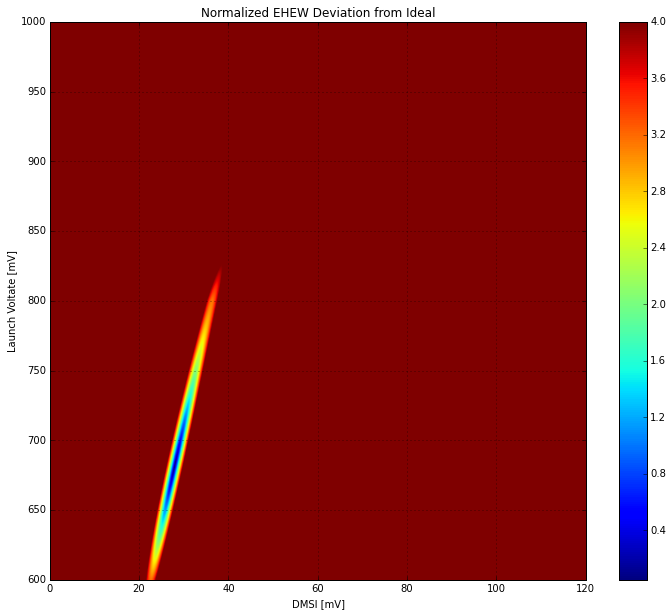

In [27]:
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot(111)
cax = ax.imshow(np.flipud(ehew_dev), extent=[xx.min(), xx.max(), yy.min(), yy.max()], vmax = 4, aspect = "auto")
numrows, numcols = ehew_dev.shape
def format_coord(x, y):
    col = np.searchsorted(dmsi_new,x)
    row = np.searchsorted(lv_new,y)
    if col>=0 and col<numcols and row>=0 and row<numrows:
        eh_val = eh_new[row,col]
        ew_val = ew_new[row,col]
        return 'x=%1.4f, y=%1.4f, eh=%1.4f, ew=%1.4f'%(x, y, eh_val, ew_val)
    else:
        return 'x=%1.4f, y=%1.4f'%(x, y)
ax.format_coord = format_coord
ax.grid()
ax.set_title("Normalized EHEW Deviation from Ideal")
ax.set_ylabel("Launch Voltate [mV]")
ax.set_xlabel("DMSI [mV]")
cbar = fig.colorbar(cax)
plt.show()

Find minimum of ehew_dev (closest to ideal value)

In [18]:
np.min(ehew_dev)

0.039040875459239989

Find coordinates of the ideal location

In [19]:
idx_min_ehew = np.argmin(ehew_dev) # Index of minima
dmsi_idx = idx_min_ehew%N_dmsi
lv_idx = idx_min_ehew//N_dmsi
dmsi_new[dmsi_idx], lv_new[lv_idx]

(27.764182424916573, 680.26755852842814)